In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads (1).csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [ ]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [ ]:
df=pd.get_dummies(df)

In [ ]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [ ]:
x=df[['User ID','Age','EstimatedSalary','Gender_Female','Gender_Male']]
y=df[['Purchased']]

In [ ]:
st=StandardScaler()
scaled=st.fit_transform(x)

In [ ]:
scaled

array([[-0.93657932, -1.78179743, -1.49004624, -1.02020406,  1.02020406],
       [ 1.66838653, -0.25358736, -1.46068138, -1.02020406,  1.02020406],
       [-0.32087714, -1.11320552, -0.78528968,  0.98019606, -0.98019606],
       ...,
       [-0.52039175,  1.17910958, -1.46068138,  0.98019606, -0.98019606],
       [ 0.88695546, -0.15807423, -1.07893824, -1.02020406,  1.02020406],
       [-1.36231017,  1.08359645, -0.99084367,  0.98019606, -0.98019606]])

In [ ]:
x=pd.DataFrame(scaled,columns=[['User ID','Age','EstimatedSalary','Gender_Female','Gender_Male']])

In [ ]:
x

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-0.936579,-1.781797,-1.490046,-1.020204,1.020204
1,1.668387,-0.253587,-1.460681,-1.020204,1.020204
2,-0.320877,-1.113206,-0.785290,0.980196,-0.980196
3,-1.233692,-1.017692,-0.374182,0.980196,-0.980196
4,1.571389,-1.781797,0.183751,-1.020204,1.020204
...,...,...,...,...,...
395,0.004517,0.797057,-0.844019,0.980196,-0.980196
396,0.203039,1.274623,-1.372587,-1.020204,1.020204
397,-0.520392,1.179110,-1.460681,0.980196,-0.980196
398,0.886955,-0.158074,-1.078938,-1.020204,1.020204


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
ypred=model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.875

In [ ]:
accuracy_score(y_test,ypred)

0.875

In [ ]:
confusion_matrix(y_test,ypred)

array([[70,  7],
       [ 8, 35]])

In [ ]:
classification_report(y_test,ypred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.90        77\n           1       0.83      0.81      0.82        43\n\n    accuracy                           0.88       120\n   macro avg       0.87      0.86      0.86       120\nweighted avg       0.87      0.88      0.87       120\n'

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
y_proba=model.predict_proba(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_proba

array([[0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2,

In [ ]:
y_predicted=y_proba[:,1]

In [ ]:
y_predicted

array([1. , 0. , 0.4, 0. , 0.2, 0. , 0. , 1. , 0.4, 0.6, 0. , 0.2, 0.6,
       0. , 0. , 0.8, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.4, 0. , 1. ,
       0. , 0.8, 0.2, 0. , 1. , 0.2, 1. , 0. , 0. , 1. , 0. , 0. , 1. ,
       0. , 0.2, 0.2, 0.2, 0. , 0.8, 0. , 0. , 1. , 0.4, 0. , 0.6, 0. ,
       0.8, 0.2, 0.8, 1. , 0. , 0.8, 0. , 0. , 0.8, 0.8, 0.6, 1. , 0.4,
       0.6, 0.2, 1. , 0. , 0. , 0. , 0.6, 0. , 0.2, 1. , 0. , 0.8, 1. ,
       0.2, 0.2, 0. , 0.8, 0. , 0.8, 0. , 0. , 0. , 0.8, 0. , 0. , 0.8,
       0.8, 0.4, 0.6, 0. , 0.6, 0.8, 0. , 0.4, 0. , 0.2, 0.6, 0. , 0. ,
       0. , 0.8, 0.2, 0. , 0. , 1. , 0.6, 0. , 0. , 0. , 1. , 0. , 0. ,
       0. , 1. , 0. ])

In [ ]:
fpr,tpr,thresold=roc_curve(y_test,y_predicted)

In [ ]:
fpr,tpr,thresold

(array([0.        , 0.03896104, 0.05194805, 0.09090909, 0.12987013,
        0.2987013 , 1.        ]),
 array([0.        , 0.30232558, 0.65116279, 0.81395349, 0.90697674,
        0.95348837, 1.        ]),
 array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))

In [ ]:
from sklearn.metrics import auc

In [ ]:
roc_auc=auc(fpr,tpr)

In [ ]:
print(roc_auc)

0.9161884627000906


<Figure size 432x288 with 0 Axes>

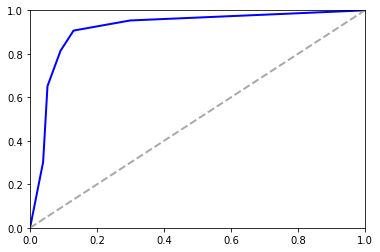

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(fpr,tpr,color='blue',lw=2,label="Roc curve")
plt.plot([0,1],[0,1],color="darkgrey",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.figure()

In [ ]:
model.predict([[-0.520392,1.179110,-1.460681,0.980196,-0.980196]])

array([1])